In [1]:
!pip install safetensors

In [2]:
#pip install --upgrade safetensors


In [3]:
pip install torch torchvision torchaudio

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [4]:
pip install -q transformers gradio accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB

In [5]:
!pip install transformers --upgrade

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import torch
from transformers import (RobertaTokenizer,
                          RobertaForSequenceClassification,
                          Trainer,
                          TrainingArguments)
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import pickle as pkl
from sklearn.preprocessing import LabelEncoder

In [7]:
# https://drive.google.com/file/d/1lMBjfxzgoGGetoBJHHmx9TmTKk-apjE_/view?usp=sharing
!gdown 1lMBjfxzgoGGetoBJHHmx9TmTKk-apjE_

Downloading...
From: https://drive.google.com/uc?id=1lMBjfxzgoGGetoBJHHmx9TmTKk-apjE_
To: /content/Restaurant_Reviews.tsv
100% 61.3k/61.3k [00:00<00:00, 3.74MB/s]


In [8]:
data = pd.read_csv("/content/Restaurant_Reviews.tsv",sep='\t')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# text process

In [9]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
from nltk.corpus import stopwords
nltk.download('stopwords')
from tqdm import tqdm
import re
import string
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from collections import Counter
import plotly.express as px
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.stem import WordNetLemmatizer    # lemmatize
from wordcloud import WordCloud, STOPWORDS
from nltk.parse import DependencyGraph
import string

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [10]:
def drop_duplicate_reviews(data, text_col, min_length=0, min_count=2):
    review_counts_df = data[text_col].value_counts().reset_index()
    review_counts_df.columns = [text_col, 'count']
    mask = (review_counts_df[text_col].str.len() >= min_length) & (review_counts_df['count'] >= min_count)
    rating_df = data[~data[text_col].isin(review_counts_df[mask][text_col])].reset_index(drop=True)
    return rating_df

def text_processing(text):
    processed_text = text.lower()
    processed_text = re.sub(r'<[^>]+>', '', processed_text)
    processed_text = re.sub(r'[^a-zA-Z0-9]', ' ', processed_text)
    words = list(set(processed_text.split()))
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    processed_text = ' '.join(words)
    processed_text = re.sub(r'\d+', 'NUM', processed_text)
    return processed_text

def main_processing_data(data):
    result_df = drop_duplicate_reviews(data, text_col='Review')
    print('Remove dulicate data sucessfully!!!')
    result_df['Review'] = result_df.Review.apply(text_processing)
    print('\nProcess text successfully!!!')
    result_df = result_df[result_df['Review']!='']
    print('\nDrop NaN rows sucessfully!!!')
    return result_df

# file_path = '/content/gdrive/MyDrive/ICT- NQH/Ratings.csv'
# main_processing_data(data).to_csv(file_path, index=False)
# print('\nLưu file csv sau khi thực hiện xử lý thành công!!!')
df = main_processing_data(data)

Remove dulicate data sucessfully!!!

Process text successfully!!!

Drop NaN rows sucessfully!!!


In [11]:
df

,Review,Liked
0,wow place love,1
1,good crust,0
2,nasti textur tasti,0
3,may rick stop holiday steve recommend love lat...,1
4,menu great select price,1
...,...,...
987,textur think lack flavor food,0
988,instantli gone appetit,0
989,impress would go back overal,0
990,ninja go sushi time whole think experi next un...,0


# Bert


In [12]:
X = df['Review']
y = df['Liked']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# # Dataset class
# class ReviewDataset(torch.utils.data.Dataset):
#     def __init__(self, encodings, label):
#         self.encodings = encodings
#         self.label = label

#     def __getitem__(self, idx):
#         item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
#         item['label'] = torch.tensor(self.label[idx])
#         return item

#     def __len__(self):
#         return len(self.label)

In [14]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [15]:
# # Tokenize the data
# train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
# test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True)

# # full_encodings = tokenizer(X.tolist(), truncation=True, padding=True)

# # Create datasets
# train_dataset = ReviewDataset(train_encodings, y_train.tolist())
# test_dataset = ReviewDataset(test_encodings, y_test.tolist())

# # full_dataset = ReviewDataset(full_encodings, y.tolist())

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
bert = '/content/drive/MyDrive/ICT- NQH/End Term/BERT/trained_model'

In [18]:
model = AutoModelForSequenceClassification.from_pretrained(bert)

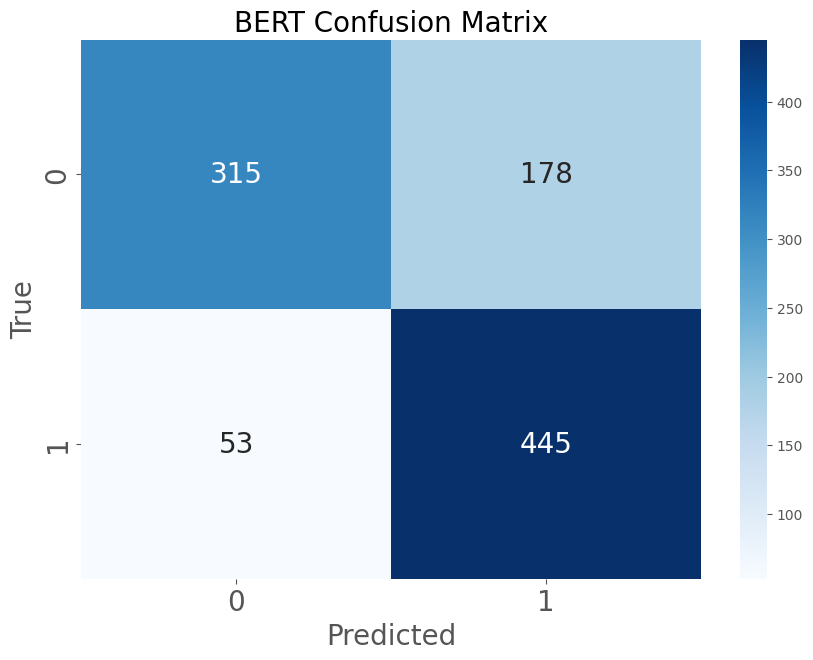

In [19]:
def evaluate(model, tokenizer, X, y, device, batch_size=32):
    model.to(device)
    model.eval()

    accuracies, precisions, recalls, f1s = [], [], [], []
    all_predictions, all_true_labels = [], []

    for i in range(0, len(X), batch_size):
        batch_X = X[i:i + batch_size]
        batch_y = y[i:i + batch_size]

        inputs = tokenizer(batch_X.tolist(), padding=True, truncation=True, return_tensors="pt").to(device)
        labels = torch.tensor(batch_y.tolist()).to(device)

        with torch.no_grad():
            outputs = model(**inputs)
            predictions = torch.argmax(outputs.logits, dim=-1)
            precision, recall, f1, _ = precision_recall_fscore_support(labels.cpu(), predictions.cpu(), average='binary')
            accuracy = accuracy_score(labels.cpu(), predictions.cpu())

            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1s.append(f1)

            all_predictions.extend(predictions.cpu().numpy())
            all_true_labels.extend(labels.cpu().numpy())

    # Calculate average metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1s) / len(f1s)

    #Plot
    cm = confusion_matrix(all_true_labels, all_predictions)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            annot_kws={"size": 20})
    plt.xlabel('Predicted', fontsize=20)
    plt.ylabel('True', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title('BERT Confusion Matrix', fontsize=20)
    plt.savefig('BERT Confusion Matrix.pdf')
    plt.show()

    return avg_accuracy, avg_precision, avg_recall, avg_f1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# acc, precision, recall, f1 = evaluate(model, tokenizer, X_test, y_test, device, batch_size=32)
acc, precision, recall, f1 = evaluate(model, tokenizer, X, y, device, batch_size=32)

In [20]:
print(f"Accuracy: \t {acc:.2f}")
print(f"Precision: \t {precision:.2f}")
print(f"Recall: \t {recall:.2f}")
print(f"F1 Score: \t {f1:.2f}")

Accuracy: 	 0.77
Precision: 	 0.69
Recall: 	 0.84
F1 Score: 	 0.75


#RoBERTa

In [21]:
roberta = '/content/drive/MyDrive/ICT- NQH/End Term/RoBERTa/model'
tokenizer_ro = RobertaTokenizer.from_pretrained('roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [22]:
ro = AutoModelForSequenceClassification.from_pretrained(roberta)

In [36]:
ro

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

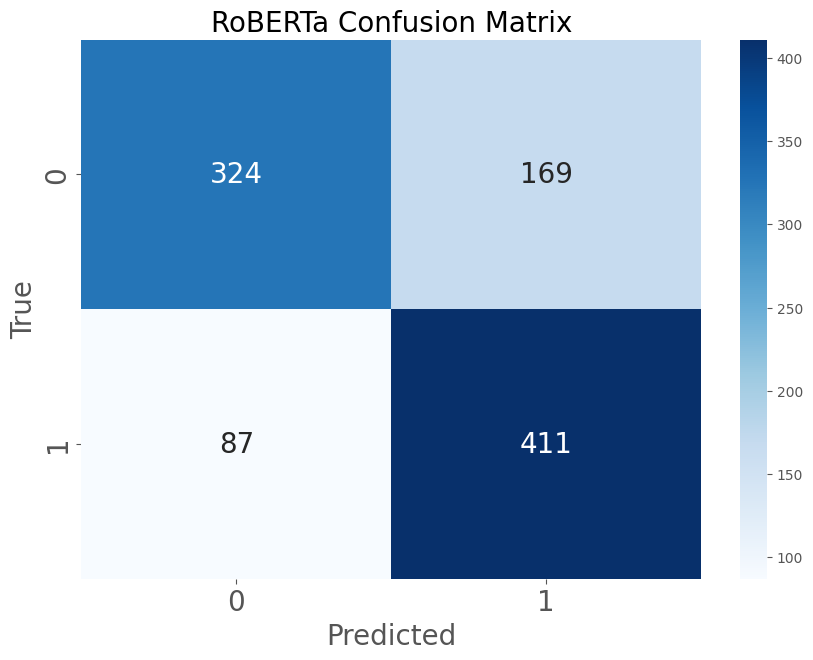

In [23]:
def evaluate(model, tokenizer, X, y, device, batch_size=32):
    model.to(device)
    model.eval()

    accuracies, precisions, recalls, f1s = [], [], [], []
    all_predictions, all_true_labels = [], []

    for i in range(0, len(X), batch_size):
        batch_X = X[i:i + batch_size]
        batch_y = y[i:i + batch_size]

        inputs = tokenizer(batch_X.tolist(), padding=True, truncation=True, return_tensors="pt").to(device)
        labels = torch.tensor(batch_y.tolist()).to(device)

        with torch.no_grad():
            outputs = model(**inputs)
            predictions = torch.argmax(outputs.logits, dim=-1)
            precision, recall, f1, _ = precision_recall_fscore_support(labels.cpu(), predictions.cpu(), average='binary')
            accuracy = accuracy_score(labels.cpu(), predictions.cpu())

            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1s.append(f1)

            all_predictions.extend(predictions.cpu().numpy())
            all_true_labels.extend(labels.cpu().numpy())

    # Calculate average metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1s) / len(f1s)

    # Plotting the confusion matrix
    cm = confusion_matrix(all_true_labels, all_predictions)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            annot_kws={"size": 20})
    plt.xlabel('Predicted', fontsize=20)
    plt.ylabel('True', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title('RoBERTa Confusion Matrix', fontsize=20)
    plt.savefig('RoBERTa Confusion Matrix.pdf')
    plt.show()

    return avg_accuracy, avg_precision, avg_recall, avg_f1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# acc, precision, recall, f1 = evaluate(model, tokenizer, X_test, y_test, device, batch_size=32)
acc, precision, recall, f1 = evaluate(ro, tokenizer_ro, X, y, device, batch_size=32)

In [24]:
print(f"Accuracy: \t {acc:.2f}")
print(f"Precision: \t {precision:.2f}")
print(f"Recall: \t {recall:.2f}")
print(f"F1 Score: \t {f1:.2f}")

Accuracy: 	 0.74
Precision: 	 0.69
Recall: 	 0.76
F1 Score: 	 0.71


#Bi-LSTM

In [25]:
model_bi = load_model('BILSTM_model.h5', compile=False)
with open('tokenizer_data.pkl', 'rb') as file:
    tokenizer_using = pkl.load(file)

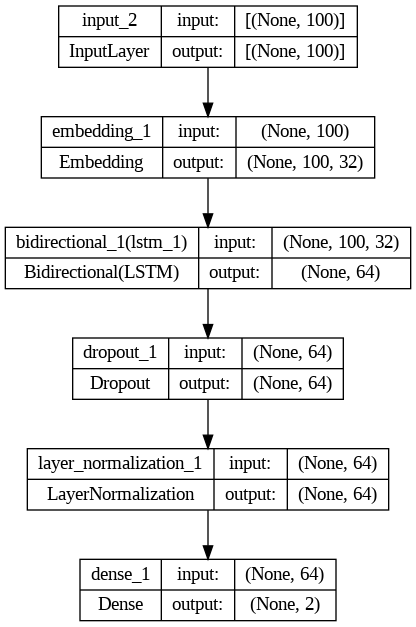

In [33]:
plot = tf.keras.utils.plot_model(model_bi,to_file = "bi.png",show_shapes = True, show_layer_names = True)
plot

In [26]:
maxlen_vector = 100
tokenizer_data_text = tokenizer_using.texts_to_sequences(X)
X_test = pad_sequences(tokenizer_data_text, padding='post', maxlen=maxlen_vector)

In [27]:
y_test = tf.keras.utils.to_categorical(y, num_classes=2, dtype='float32')

In [28]:
y_pred = model_bi.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
print(classification_report(y_true_labels, y_pred_labels))

31/31 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       493
           1       0.75      0.70      0.73       498

    accuracy                           0.73       991
   macro avg       0.73      0.73      0.73       991
weighted avg       0.73      0.73      0.73       991



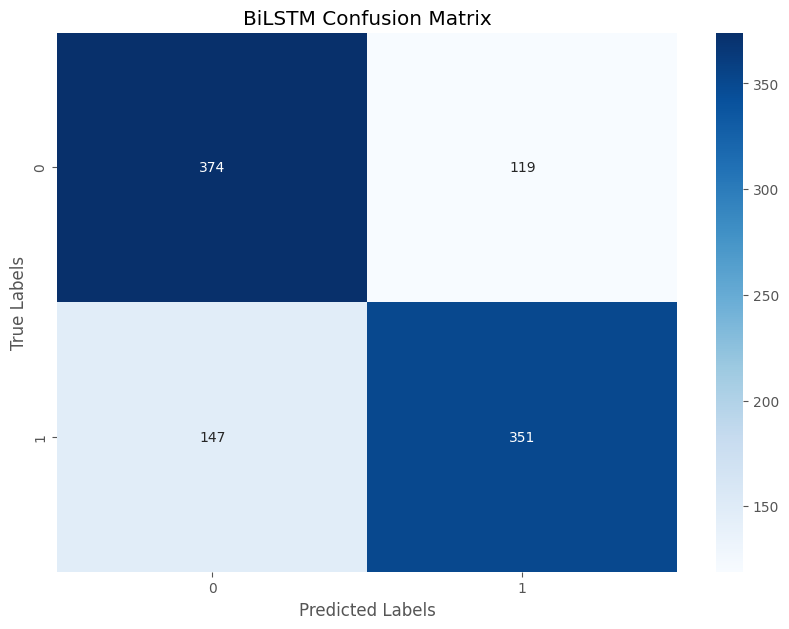

In [29]:
le = LabelEncoder()
plt.figure(figsize=(10,7))
true_labels_encoded = le.fit_transform(y_true_labels)
predicted_labels_encoded = le.transform(y_pred_labels)

cm = confusion_matrix(true_labels_encoded, predicted_labels_encoded)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('BiLSTM Confusion Matrix')
plt.show()